# Making Business Decisions Based on Data


We are an analysts at a big online store. Together with the marketing department, we've compiled a list of hypotheses that may help boost revenue. We need to prioritize these hypotheses, launch an A/B test, and analyze the results.

In [1]:
import seaborn as sns 

import matplotlib.pyplot as plt

import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import scipy.stats as stats
pd.set_option('max_colwidth', 400)

Prioritizing Hypotheses


In [2]:
try :
    data=pd.read_csv('/datasets/hypotheses_us.csv',sep=';')
except:
    print('cant read the data')

In [3]:
data.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1


Part 1. Prioritizing Hypotheses


ICE

In [4]:
data.describe()

,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [5]:
data.isnull()

,Hypothesis,Reach,Impact,Confidence,Effort
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False


Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.

ice is import x confidence x effort to protize the hypothesis 

In [6]:
data['ice']=(data['Impact']*data['Confidence']/data['Effort']).round()
data.sort_values(by='ice',ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ice
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.0


The most promissing hypotheses according to ICE method are 8, 0, 7, 6, 2.



rice

rice= reach*imact*[confidence/effort]

In [7]:
data['rice']=(data['Reach']*data['Impact']*(data['Confidence']/data['Effort'])).round()
data.sort_values(by='rice',ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ice,rice
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.0,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.0,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.0,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.0,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.0,16.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.0,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.0,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.0,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.0,3.0


The most promissing hypotheses according to RICE method are 7, 2, 0, 6, 8.




ICE : 8, 0, 7, 6, 2

RICE: 7, 2, 0, 6, 8

We have the same top five hypotheses in both methods. But in RICE hyposesis 7 became a leader. That's because of its REACH parameter 10 (10 out of 10). REACH parameter tells us how many users will be affected by the update we want to introduce. RICE method take into account not only how strong the hyposesis is, but also how many users it will affect.


Part 2. A/B Test Analysis






In [8]:
orders=pd.read_csv('/datasets/orders_us.csv')
visits=pd.read_csv('/datasets/visits_us.csv')

In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [11]:
dup= orders.groupby('visitorId').agg({'group':'nunique'})
dup.head()

,group
visitorId,
5114589,1
6958315,1
8300375,2
11685486,1
39475350,1


In [12]:
dup1= dup[dup['group']>1].reset_index()
len(dup1)

58

In [13]:
dup1.head()

,visitorId,group
0,8300375,2
1,199603092,2
2,232979603,2
3,237748145,2
4,276558944,2


In [14]:
orders=orders.loc[~orders['visitorId'].isin(dup1['visitorId'])]
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [15]:
orders['date']=pd.to_datetime(orders['date'])

In [16]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [17]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [18]:
visits[visits.duplicated(keep=False)]


,date,group,visits


We have 62 entries in visitors table, 3 columns. There are no missing values, no duplicates.



In [19]:
visits['date']=pd.to_datetime(visits['date'])
visits.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Analyze the A/B test:
Graph cumulative revenue by group. Make conclusions and conjectures.


In [20]:
# building an array with unique paired date-group values
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [21]:
# daily revenue per each group
import numpy as np 
ordersAggregated = datesGroups.apply(lambda x: 
                                     orders[np.logical_and(orders['date'] <= x['date'], 
                                                           orders['group'] == x['group'])].
                                             agg({'date':'max', 
                                                  'group':'max', 
                                                  'transactionId':pd.Series.nunique, 
                                                  'visitorId':pd.Series.nunique, 
                                                  'revenue':'sum'}), axis=1).sort_values(by=['date','group'])

ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1


In [22]:
# daily vistors per group and date 
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [23]:
# merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


In [24]:
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Graph cumulative revenue by group. Make conclusions and conjectures.


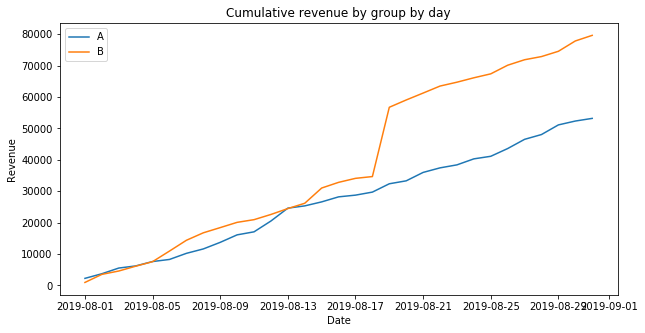

In [25]:
plt.figure(figsize=(10, 5))

# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Cumulative revenue by group by day')
plt.show()

We can see that revenue of both group is rising steadily throughout the whole test. The cumulative revenue of group B are higher than that of group A. There is a sharp rise in revenue of group B at certain point (after 2019-08-17). This may indicate the existence of outliers (or a jump in number of orders, or presence of very expensive orders).

Graph cumulative average order size by group. Make conclusions and conjectures.

daily average revnue/number of orders per day

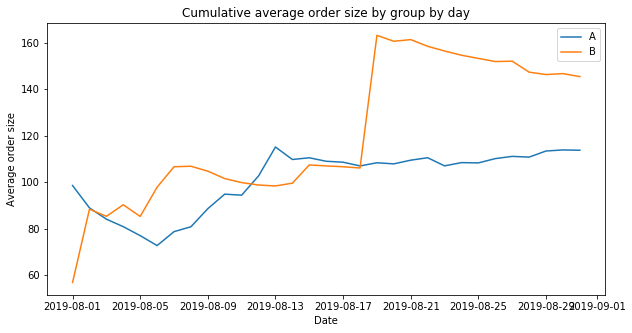

In [26]:

plt.figure(figsize=(10, 5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Average order size')
plt.title('Cumulative average order size by group by day')
plt.show()

It seems like average order size becomes steady by the end of the test for group A. It grows till certain point and then falling for group B. The spike in group B on 2019-08-18 may have been due to the presence of large, expensive orders.

Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.


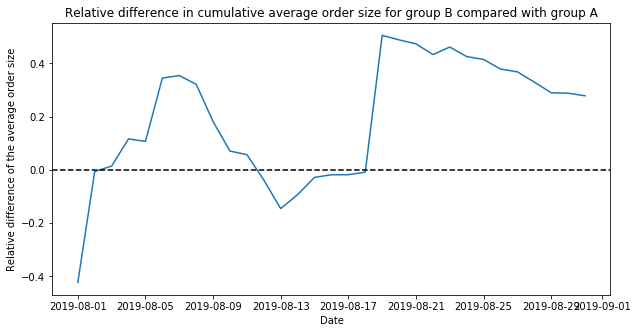

In [27]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 5))

# plotting a relative difference graph for the average order sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--') 

plt.xlabel('Date')
plt.ylabel('Relative difference of the average order size')
plt.title('Relative difference in cumulative average order size for group B compared with group A')
plt.show()

We can see that at several points the difference between the groups spikes. This means there must be some big orders and outliers.



Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.


In [28]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

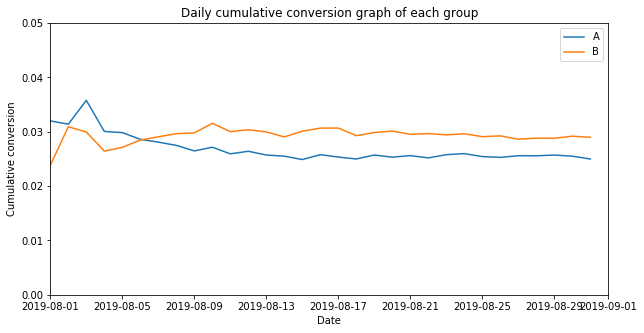

In [29]:
plt.figure(figsize=(10, 5))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Cumulative conversion')
plt.title('Daily cumulative conversion graph of each group')


# setting the axes' scale
plt.axis(['2019-08-01', '2019-09-01', 0, 0.05])
plt.show()


At the beggining of the test group A had a higher convertion rate than gruop B. But at some point it changed. Conversion rate of group A dropped and then stabilized, the conversion rate of group B rose and then stabilized.

Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.


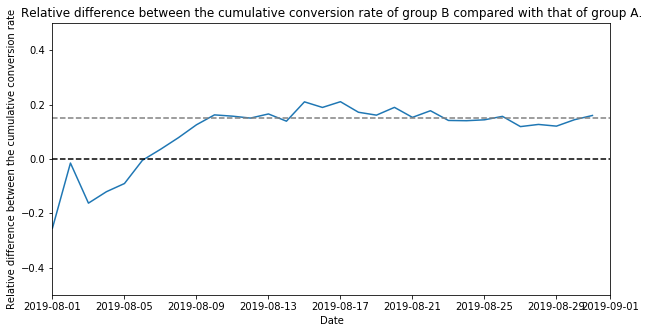

In [30]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.xlabel('Date')
plt.ylabel('Relative difference between the cumulative conversion rate')
plt.title('Relative difference between the cumulative conversion rate of group B compared with that of group A.')


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis(['2019-08-01', '2019-09-01', -0.5, 0.5])

plt.show()

Group B was the leader in conversion almost from the beggining. It grew steadily and stabilized about 15% higher than in group A



Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.


Let's find the number of orders per user.



In [31]:
# remove the unnecessary columns, group the orders by users, find the number of distinct orders
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['userId','orders']

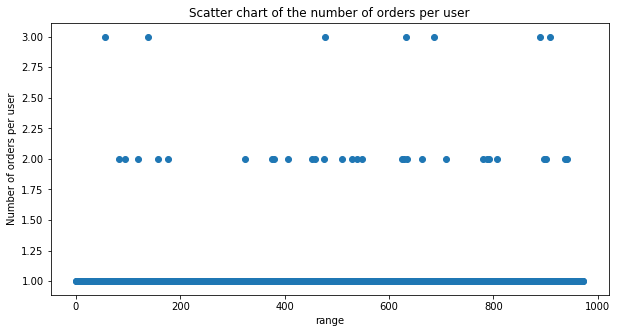

In [32]:
# the range of numbers from 0 to the number of observations in ordersByUsers
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(10, 5))
plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('range')
plt.ylabel('Number of orders per user')
plt.title('Scatter chart of the number of orders per user')

plt.show()

The majority of users placed only one order. We can see also users with two and three orders. It's not clear whether we should consider them anomalies or not. Let's calculate the 95th and 99th percentiles for the number of orders per user.



In [33]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))


[1. 2.]


Not more than 5% of users placed more than one order, and not more than 1% of users placed more than two orders.



Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.


Now we'll plot a scatter chart of order prices.


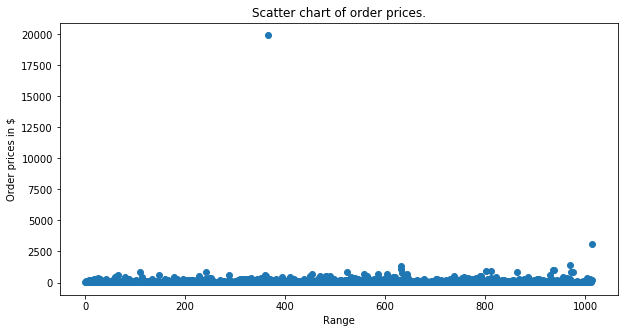

In [34]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders['revenue'])

plt.xlabel('Range')
plt.ylabel('Order prices in $')
plt.title('Scatter chart of order prices.')

plt.show()


Most of the order prices is less then 2,000 dollars. We can see one order is about 3,000 dollars and one more is about 20,000 dollars. According to the graph these two values are definitely outliers. But let's look at percentiles.

Let's calculate the 95th and 99th percentiles of order prices and define the point at which a data point becomes an anomaly.

In [35]:
print(np.percentile(orders['revenue'], [95, 99]))


[414.275 830.3  ]


Not more than 5% of orders cost more than 415 dollars, and not more than 1% cost more than 830 dollars.

Let's define anomalous users as those who place one order bigger than 600 dollars.

So, we define anomalous users as those who place more than one order or one order bigger than 600 dollars. Thus we'll remove the 5% of users with the largest numbers of orders and from 1% to 5% of the users with the most expensive orders.




In [36]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

Now we'll declare the variables sampleA and sampleB, with users from different groups and corresponding numbers of orders. Those who didn't order anything will have 0.



In [37]:

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [38]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Relative conversion gain for group B: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-value: 0.006
Relative conversion gain for group B: 0.160


In [39]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1],alternative = ' two-sided'))
print("Relative difference in average order size between the groups: {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.431
Relative difference in average order size between the groups: 0.278


Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.


In [40]:
# data slices with the users who placed more than one order
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 1]['userId']], axis = 0)

# users who placed orders for more than $600
usersWithExpensiveOrders = orders[orders['revenue'] > 600]['visitorId']

# join two tables
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print("The number of anomalous users:", abnormalUsers.shape[0])

The number of anomalous users: 59


In [41]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [42]:

print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1],alternative =  'two-sided'))
print("Relative conversion gain for group B: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.003
Relative conversion gain for group B: 0.196


As happaned with raw data, the p-value is lower than 0.05 so we reject the null hypothesis. The groups' conversion rates have statistically significant differences. The relative conversion gain for group B compared with group A is about 20%.



Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.


In [43]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],alternative =  'two-sided')[1]))

print("Relative difference in average order size between the groups: {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value: 0.834
Relative difference in average order size between the groups: 0.061


Conclusions
* There's a statistically significant difference in conversion rate between the groups, according to both the raw and the filtered data.
* Neither raw nor filtered data revealed any statistically significant differences in average order size between the groups.
* The graph of the difference in conversion between the groups shows that group B's results are better than those of group A.
* We can stop the test and conclud that in terms of average order size we see no statistic difference.That means we attract the same users in terms of purchase behavior. But in term of conversion, group B perfomes better than group A. That means we attract more customers that pay us money